In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker 
from sklearn.metrics import r2_score, f1_score
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import backend as K

In [3]:
# reading and displaying data
data=pd.read_csv("data-1733121192419-dunkin.csv")
data.loc[:, 'time_dt'] = pd.to_datetime(data.time).values
data = data.set_index('time_dt').asfreq('1min')
display(data)

,id,virtual_meter_id,time,Eact1,Eact2,Eact3,Eact,Eapp1,Eapp2,Eapp3,Eapp,Ereac1,Ereac2,Ereac3,Ereac
time_dt,,,,,,,,,,,,,,,
2024-10-10 20:51:00,134706361.0,GUR001_6907_a007,2024-10-10 20:51:00+00,0.038820,0.000534,0.002151,0.041506,0.039529,0.004173,0.004376,0.048079,-0.007452,0.004139,0.003811,0.000497
2024-10-10 20:52:00,134706362.0,GUR001_6907_a007,2024-10-10 20:52:00+00,0.038733,0.000534,0.002151,0.041417,0.039445,0.004174,0.004371,0.047991,-0.007463,0.004140,0.003805,0.000482
2024-10-10 20:53:00,134706363.0,GUR001_6907_a007,2024-10-10 20:53:00+00,0.038841,0.000536,0.002150,0.041527,0.039542,0.004189,0.004369,0.048101,-0.007412,0.004155,0.003804,0.000546
2024-10-10 20:54:00,134706364.0,GUR001_6907_a007,2024-10-10 20:54:00+00,0.038403,0.000535,0.002150,0.041089,0.039107,0.004190,0.004372,0.047669,-0.006708,0.004156,0.003807,0.001256
2024-10-10 20:55:00,134706365.0,GUR001_6907_a007,2024-10-10 20:55:00+00,0.022849,0.000536,0.000987,0.024372,0.024770,0.004194,0.003945,0.032909,0.009425,0.004160,0.003714,0.017299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02 06:25:00,141165735.0,GUR001_6907_a007,2024-12-02 06:25:00+00,0.032057,0.014561,0.028540,0.075159,0.034434,0.014712,0.028722,0.077868,-0.012569,-0.001270,0.003159,-0.010680
2024-12-02 06:26:00,141165736.0,GUR001_6907_a007,2024-12-02 06:26:00+00,0.037509,0.012992,0.023918,0.074419,0.039953,0.012994,0.024113,0.077060,-0.013718,-0.000248,0.002934,-0.011033
2024-12-02 06:27:00,141165737.0,GUR001_6907_a007,2024-12-02 06:27:00+00,0.038179,0.012374,0.020062,0.070615,0.041264,0.012375,0.020321,0.073960,-0.015627,-0.000142,0.003124,-0.012645


In [4]:
# Extract the date and time into separate columns
data['date'] = data.index.date   # Extracts the date part
data['time'] = data.index.time   # Extracts the time part
display(data)


,id,virtual_meter_id,time,Eact1,Eact2,Eact3,Eact,Eapp1,Eapp2,Eapp3,Eapp,Ereac1,Ereac2,Ereac3,Ereac,date
time_dt,,,,,,,,,,,,,,,,
2024-10-10 20:51:00,134706361.0,GUR001_6907_a007,20:51:00,0.038820,0.000534,0.002151,0.041506,0.039529,0.004173,0.004376,0.048079,-0.007452,0.004139,0.003811,0.000497,2024-10-10
2024-10-10 20:52:00,134706362.0,GUR001_6907_a007,20:52:00,0.038733,0.000534,0.002151,0.041417,0.039445,0.004174,0.004371,0.047991,-0.007463,0.004140,0.003805,0.000482,2024-10-10
2024-10-10 20:53:00,134706363.0,GUR001_6907_a007,20:53:00,0.038841,0.000536,0.002150,0.041527,0.039542,0.004189,0.004369,0.048101,-0.007412,0.004155,0.003804,0.000546,2024-10-10
2024-10-10 20:54:00,134706364.0,GUR001_6907_a007,20:54:00,0.038403,0.000535,0.002150,0.041089,0.039107,0.004190,0.004372,0.047669,-0.006708,0.004156,0.003807,0.001256,2024-10-10
2024-10-10 20:55:00,134706365.0,GUR001_6907_a007,20:55:00,0.022849,0.000536,0.000987,0.024372,0.024770,0.004194,0.003945,0.032909,0.009425,0.004160,0.003714,0.017299,2024-10-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02 06:25:00,141165735.0,GUR001_6907_a007,06:25:00,0.032057,0.014561,0.028540,0.075159,0.034434,0.014712,0.028722,0.077868,-0.012569,-0.001270,0.003159,-0.010680,2024-12-02
2024-12-02 06:26:00,141165736.0,GUR001_6907_a007,06:26:00,0.037509,0.012992,0.023918,0.074419,0.039953,0.012994,0.024113,0.077060,-0.013718,-0.000248,0.002934,-0.011033,2024-12-02
2024-12-02 06:27:00,141165737.0,GUR001_6907_a007,06:27:00,0.038179,0.012374,0.020062,0.070615,0.041264,0.012375,0.020321,0.073960,-0.015627,-0.000142,0.003124,-0.012645,2024-12-02


In [5]:
# convert datetime to string type to allow spliting and dropping seconds column since data takes reading every one minute 
data['time'] = data['time'].astype(str)  # Convert to string
data[['hour', 'minute' , 'second']] = data['time'].str.split(':', expand=True).astype(int)
data = data.drop(columns=['second'])
data

,id,virtual_meter_id,time,Eact1,Eact2,Eact3,Eact,Eapp1,Eapp2,Eapp3,Eapp,Ereac1,Ereac2,Ereac3,Ereac,date,hour,minute
time_dt,,,,,,,,,,,,,,,,,,
2024-10-10 20:51:00,134706361.0,GUR001_6907_a007,20:51:00,0.038820,0.000534,0.002151,0.041506,0.039529,0.004173,0.004376,0.048079,-0.007452,0.004139,0.003811,0.000497,2024-10-10,20,51
2024-10-10 20:52:00,134706362.0,GUR001_6907_a007,20:52:00,0.038733,0.000534,0.002151,0.041417,0.039445,0.004174,0.004371,0.047991,-0.007463,0.004140,0.003805,0.000482,2024-10-10,20,52
2024-10-10 20:53:00,134706363.0,GUR001_6907_a007,20:53:00,0.038841,0.000536,0.002150,0.041527,0.039542,0.004189,0.004369,0.048101,-0.007412,0.004155,0.003804,0.000546,2024-10-10,20,53
2024-10-10 20:54:00,134706364.0,GUR001_6907_a007,20:54:00,0.038403,0.000535,0.002150,0.041089,0.039107,0.004190,0.004372,0.047669,-0.006708,0.004156,0.003807,0.001256,2024-10-10,20,54
2024-10-10 20:55:00,134706365.0,GUR001_6907_a007,20:55:00,0.022849,0.000536,0.000987,0.024372,0.024770,0.004194,0.003945,0.032909,0.009425,0.004160,0.003714,0.017299,2024-10-10,20,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-02 06:25:00,141165735.0,GUR001_6907_a007,06:25:00,0.032057,0.014561,0.028540,0.075159,0.034434,0.014712,0.028722,0.077868,-0.012569,-0.001270,0.003159,-0.010680,2024-12-02,6,25
2024-12-02 06:26:00,141165736.0,GUR001_6907_a007,06:26:00,0.037509,0.012992,0.023918,0.074419,0.039953,0.012994,0.024113,0.077060,-0.013718,-0.000248,0.002934,-0.011033,2024-12-02,6,26
2024-12-02 06:27:00,141165737.0,GUR001_6907_a007,06:27:00,0.038179,0.012374,0.020062,0.070615,0.041264,0.012375,0.020321,0.073960,-0.015627,-0.000142,0.003124,-0.012645,2024-12-02,6,27


In [6]:
# Create a new column for the weekday number (0=Monday, 6=Sunday)
data['date2'] = pd.to_datetime(data['date'])
data['month'] = data['date2'].dt.month
data['weekday_number'] = data['date2'].dt.weekday
data['weekday_number'] = data['weekday_number'].astype(int)  # Convert to int
data = data.drop(columns=['date2'])
public_holidays = pd.to_datetime([
    '2024-10-12',  # Dussehra
    '2024-10-17',  # Maharishi Valmiki Jayanti
    '2024-10-31',  # Diwali
    '2024-11-15'   # Guru Nanak Jayanti
])
# Ensure your 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'])

# Filter rows where the date is a public holiday
mask = data['date'].isin(public_holidays)

# Set weekday_number to 6 (Sunday) for these public holidays
data.loc[mask, 'weekday_number'] = 6


Building_Upon_Previous_ideas_and_plotting_for_specific_months

In [7]:
df_november = data[data['month'] == 11]
df_october = data[data['month'] == 10]
df_nov_week = data['weekday_number']
df_november.fillna(0)
df_november.loc[(df_november['hour'] == 12) & (df_november['minute'] == 55)]
new_df = df_november.filter(items=['Eact', 'Eapp', 'Ereac', 'hour',	'minute', 'date'])
new_df['time'] = new_df.apply(lambda row: f"{row['hour']}:{row['minute']}", axis=1)
new_df = df_november.filter(items=['Eact', 'Eapp', 'Ereac','time','date'])
new_df.fillna(0)
train_df = new_df[new_df['date']=='2024-11-3']  #3
df_dropped = train_df[train_df.isna().any(axis=1)]  # Rows with NaN values
df_cleaned = train_df.dropna()
df_cleaned.isnull().sum()
df_cleaned



,Eact,Eapp,Ereac,time,date
time_dt,,,,,
2024-11-03 00:00:00,0.018714,0.029397,-0.016067,00:00:00,2024-11-03
2024-11-03 00:01:00,0.018472,0.029251,-0.016133,00:01:00,2024-11-03
2024-11-03 00:02:00,0.018254,0.028692,-0.015563,00:02:00,2024-11-03
2024-11-03 00:03:00,0.021838,0.028923,-0.011356,00:03:00,2024-11-03
2024-11-03 00:04:00,0.021696,0.028526,-0.011042,00:04:00,2024-11-03
...,...,...,...,...,...
2024-11-03 23:55:00,0.005424,0.008728,0.004988,23:55:00,2024-11-03
2024-11-03 23:56:00,0.008595,0.011701,0.000158,23:56:00,2024-11-03
2024-11-03 23:57:00,0.008488,0.011599,0.000154,23:57:00,2024-11-03


In [8]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

data = df_cleaned
scaler = MinMaxScaler()
features = ['Eact', 'Eapp', 'Ereac']
values_scaled = scaler.fit_transform(data[features])



In [9]:
data.loc[:, 'time_seconds'] = pd.to_timedelta(data['time']).dt.total_seconds()
max_time = data['time_seconds'].max()
data.loc[:, 'time_sin'] = np.sin(2 * np.pi * data['time_seconds'] / max_time)
data.loc[:, 'time_cos'] = np.cos(2 * np.pi * data['time_seconds'] / max_time)
time_features = data[['time_sin', 'time_cos']].values


C:\Users\sansh\AppData\Local\Temp\ipykernel_15188\3474402654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'time_seconds'] = pd.to_timedelta(data['time']).dt.total_seconds()
C:\Users\sansh\AppData\Local\Temp\ipykernel_15188\3474402654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'time_sin'] = np.sin(2 * np.pi * data['time_seconds'] / max_time)
C:\Users\sansh\AppData\Local\Temp\ipykernel_15188\3474402654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [24]:
#  Assuming values_scaled and time_features are defined and preprocessed
inputs_data = np.hstack([values_scaled, time_features])
print("Input data shape:", inputs_data.shape)

# Define VAE dimensions
original_dim = inputs_data.shape[1]  # This will be the total number of features (5)
latent_dim = 2  # Latent space dimension
intermediate_dim = 16  # Size of intermediate layer

# Encoder
inputs = Input(shape=(original_dim,))
h = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)


Input data shape: (1310, 5)


In [25]:
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Encoder model
encoder = Model(inputs, [z_mean, z_log_var, z])

# Decoder
latent_inputs = Input(shape=(latent_dim,))
h_decoded = Dense(intermediate_dim, activation='relu')(latent_inputs)
x_decoded_mean = Dense(original_dim, activation='sigmoid')(h_decoded)  # Output layer for reconstruction

# Decoder model
decoder = Model(latent_inputs, x_decoded_mean)

# VAE model (combining encoder and decoder)
z_mean, z_log_var, z = encoder(inputs)
x_decoded_mean = decoder(z)

vae = Model(inputs, x_decoded_mean)

# Print model summaries
print(encoder.summary())
print(decoder.summary())
print(vae.summary())


Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 5)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 16)        │         96 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 2)         │         34 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 2)         │         34 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_3 (Lambda)   │ (None, 2)         │          0 │ dense_10[0][0],   │
│                     │                   │            │ dense_11[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 164 (656.00 B)

 Trainable params: 164 (656.00 B)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 16)             │            48 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 133 (532.00 B)

 Trainable params: 133 (532.00 B)

 Non-trainable params: 0 (0.00 B)

None


Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_13 (Functional)      │ [(None, 2), (None, 2), │           164 │
│                                 │ (None, 2)]             │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ functional_15 (Functional)      │ (None, 5)              │           133 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 297 (1.16 KB)

 Trainable params: 297 (1.16 KB)

 Non-trainable params: 0 (0.00 B)

None


In [26]:
import tensorflow as tf
from tensorflow.keras import layers, Model

class VAE(Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder

    def call(self, inputs):
        # Get the encoder outputs
        z_mean, z_log_var, z = self.encoder(inputs)
        
        # Get the reconstruction
        reconstruction = self.decoder(z)
        
        # Add losses
        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                tf.square(inputs - reconstruction),
                axis=[1, 2, 3] if len(inputs.shape) == 4 else 1
            )
        )
        
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
                axis=1
            )
        )
        
        self.add_loss(reconstruction_loss + kl_loss)
        
        return reconstruction

    def train_step(self, data):
        with tf.GradientTape() as tape:
            reconstruction = self(data)  # Forward pass
            loss = self.losses[0]  # Get the loss we just calculated
            
        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        
        return {"loss": loss}

In [27]:
# Assuming you have your encoder and decoder already defined:
vae = VAE(encoder, decoder)
vae.compile(optimizer='adam')
# vae.fit(x_train, epochs=epochs, batch_size=batch_size)

In [30]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np

# Sampling layer
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

# Encoder
class Encoder(layers.Layer):
    def __init__(self, latent_dim, intermediate_dim):
        super(Encoder, self).__init__()
        self.dense_1 = layers.Dense(intermediate_dim, activation='relu')
        self.dense_2 = layers.Dense(intermediate_dim, activation='relu')
        self.z_mean = layers.Dense(latent_dim)
        self.z_log_var = layers.Dense(latent_dim)
        self.sampling = Sampling()

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        z_mean = self.z_mean(x)
        z_log_var = self.z_log_var(x)
        z = self.sampling([z_mean, z_log_var])
        return z_mean, z_log_var, z

# Decoder
class Decoder(layers.Layer):
    def __init__(self, original_dim, intermediate_dim):
        super(Decoder, self).__init__()
        self.dense_1 = layers.Dense(intermediate_dim, activation='relu')
        self.dense_2 = layers.Dense(intermediate_dim, activation='relu')
        self.dense_output = layers.Dense(original_dim)

    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        return self.dense_output(x)

# VAE model
class VAE(Model):
    def __init__(self, original_dim, intermediate_dim=64, latent_dim=32):
        super(VAE, self).__init__()
        self.encoder = Encoder(latent_dim, intermediate_dim)
        self.decoder = Decoder(original_dim, intermediate_dim)

    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstruction = self.decoder(z)
        
        # Add losses
        reconstruction_loss = tf.reduce_mean(
            tf.reduce_sum(
                tf.square(inputs - reconstruction),
                axis=1
            )
        )
        
        kl_loss = -0.5 * tf.reduce_mean(
            tf.reduce_sum(
                1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var),
                axis=1
            )
        )
        
        self.add_loss(reconstruction_loss + kl_loss)
        return reconstruction

# Data preparation and model training
def prepare_and_train_vae(data, epochs=50, batch_size=32):
    # Get the input dimension
    original_dim = data.shape[1]
    
    # Normalize the data
    data_normalized = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    
    # Create and compile the model
    vae = VAE(original_dim=original_dim)
    vae.compile(optimizer='adam')
    
    # Train the model
    history = vae.fit(
        data_normalized,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.1,
        shuffle=True
    )
    
    return vae, history

# Usage example:
# Assuming X_train is your input data:

vae, history = prepare_and_train_vae(
    inputs_data,
    epochs=50,
    batch_size=32
)


Epoch 1/50


c:\Users\sansh\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 5.8189 - val_loss: 6.7878
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 4.5661 - val_loss: 4.3551
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 4.0467 - val_loss: 3.5350
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 3.9101 - val_loss: 3.8500
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 3.8165 - val_loss: 3.8925
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 3.6408 - val_loss: 3.4058
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 3.8326 - val_loss: 3.6372
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 3.8863 - val_loss: 3.8918
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 3.5897 - val_loss: 4.1455
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 3.6678 - val_loss: 3.4025
Epoch 11/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 3.5588 - val_loss: 3.6981
Epoch 12/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 3.5797 - val_l

In [32]:
X_train, X_test = train_test_split(inputs_data, test_size=0.1, random_state=42)
vae, history = prepare_and_train_vae(
    X_train,
    epochs=50,
    batch_size=32
)

Epoch 1/50


c:\Users\sansh\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 6.1144 - val_loss: 5.1926
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 4.7707 - val_loss: 4.3977
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 3.9361 - val_loss: 4.0693
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 3.9886 - val_loss: 3.9649
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 3.7608 - val_loss: 4.1391
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 3.7926 - val_loss: 3.9954
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 3.9246 - val_loss: 3.9492
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 3.7668 - val_loss: 3.9902
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 3.6266 - val_loss: 4.3266
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 3.6538 - val_loss: 3.7129
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 3.6702 - val_loss: 3.8171
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 3.6501 - val_l

In [44]:
# Get reconstructions for your X_test data
reconstructions = vae(X_test)

# Compare original vs reconstructions
print("Original test data shape:", X_test.shape)
print("Reconstructed data shape:", reconstructions.shape)

# Look at specific examples:
print("\nOriginal first example:")
print(X_test[0])
print("\nReconstructed first example:")
print(reconstructions[0])

# Calculate reconstruction error
reconstruction_error = tf.reduce_mean(tf.square(X_test - reconstructions))
print("\nAverage reconstruction error:", reconstruction_error.numpy())

Original test data shape: (131, 5)
Reconstructed data shape: (131, 5)

Original first example:
[ 0.8726824   0.87823068  0.30812973 -0.08068976 -0.99673927]

Reconstructed first example:
tf.Tensor([ 0.5677242   0.57712185 -0.6417656   0.5786163  -0.57885647], shape=(5,), dtype=float32)

Average reconstruction error: 0.4329873


In [45]:
input_data = tf.convert_to_tensor([[0, 0, 0, -0.08068976, -0.99673927]], dtype=tf.float32)

# Pass the tensor to the VAE model
reconstructions_1 = vae(input_data)
print(reconstructions_1)

tf.Tensor([[ 1.1499575   1.1892984  -0.72011006 -0.5819013  -1.1262741 ]], shape=(1, 5), dtype=float32)


In [121]:
# Group by the 'date' column and calculate the mean for each power consumption column
daily_power_consumption = df_november.groupby('date').agg({
    'Eact': 'mean',
    'Eapp': 'mean',
    'Ereac': 'mean'
}).reset_index()
daily_power_consumption_oct = df_october.groupby('date').agg({
    'Eact': 'mean',
    'Eapp': 'mean',
    'Ereac': 'mean'
}).reset_index()
daily_power_consumption


,date,Eact,Eapp,Ereac
0,2024-11-01,0.060802,0.064237,-0.007262
1,2024-11-02,0.079972,0.083670,-0.013212
2,2024-11-03,0.058956,0.062241,-0.008819
3,2024-11-04,0.050261,0.053634,-0.005802
4,2024-11-05,0.055810,0.059138,-0.006647
5,2024-11-06,0.056935,0.060541,-0.008082
6,2024-11-07,0.068272,0.071589,-0.008435
7,2024-11-08,0.059175,0.062471,-0.007668
8,2024-11-09,0.086048,0.089469,-0.012954
9,2024-11-10,0.081894,0.085636,-0.012511


,date,Eact,Eapp,Ereac,day
0,2024-10-10,0.046109,0.049864,-0.001550,10
1,2024-10-11,0.102367,0.109660,-0.024267,11
2,2024-10-12,0.083675,0.087031,-0.014489,12
3,2024-10-13,0.065929,0.069697,-0.011796,13
4,2024-10-14,0.050240,0.053927,-0.006315,14
5,2024-10-15,0.055984,0.059569,-0.008630,15
6,2024-10-16,0.056896,0.060566,-0.008911,16
7,2024-10-17,0.065567,0.069581,-0.012615,17
8,2024-10-18,0.070062,0.073147,-0.011826,18
9,2024-10-19,0.094373,0.098653,-0.018175,19


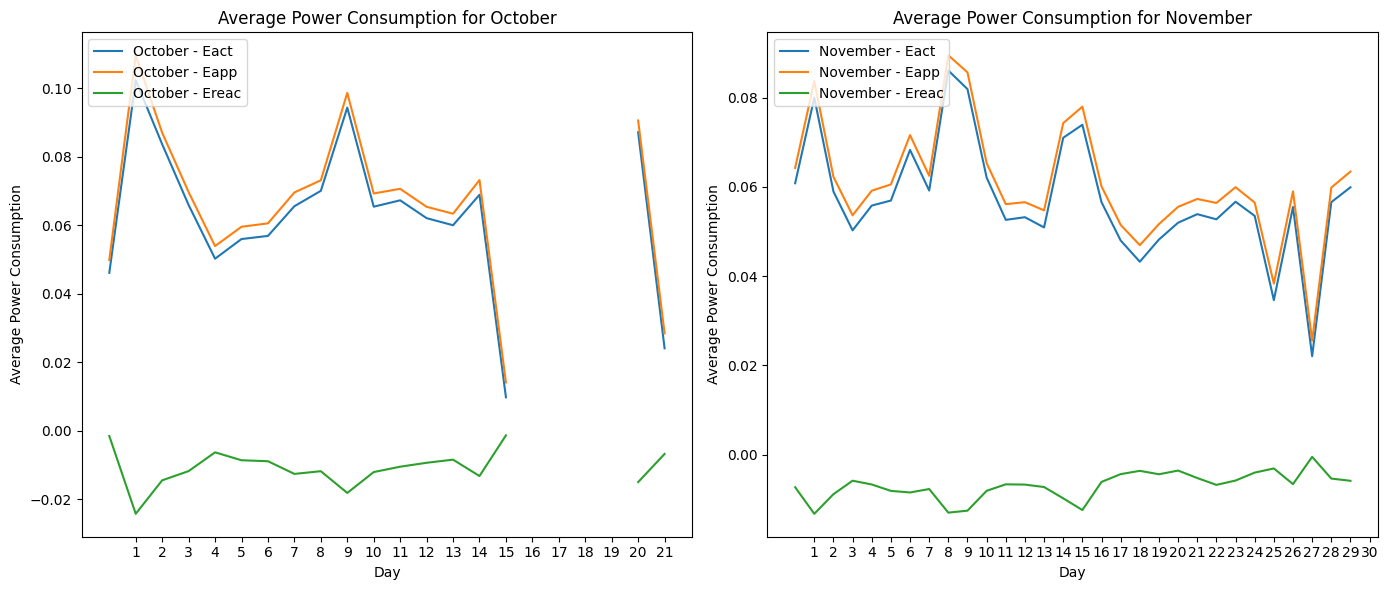

In [ ]:
daily_power_consumption['date'] = pd.to_datetime(daily_power_consumption['date'])
daily_power_consumption['day'] = daily_power_consumption['date'].dt.day

daily_power_consumption_oct['date'] = pd.to_datetime(daily_power_consumption_oct['date'])
daily_power_consumption_oct['day'] = daily_power_consumption_oct['date'].dt.day

display(daily_power_consumption_oct)


fig, axs = plt.subplots(1, 2, figsize=(14, 6))

for column in ['Eact','Eapp','Ereac']:
    axs[0].plot(daily_power_consumption_oct.index, daily_power_consumption_oct[column], label=f'October - {column}')

axs[0].set_title('Average Power Consumption for October')
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Average Power Consumption')
axs[0].legend(loc='upper left')
axs[0].set_xticks(range(1, daily_power_consumption_oct.index.max() + 1))  # Set x-ticks for the days

# Plot for November in the second subplot
for column in ['Eact','Eapp','Ereac']:
    axs[1].plot(daily_power_consumption.index, daily_power_consumption[column], label=f'November - {column}')

axs[1].set_title('Average Power Consumption for November')
axs[1].set_xlabel('Day')
axs[1].set_ylabel('Average Power Consumption')
axs[1].legend(loc='upper left')
axs[1].set_xticks(range(1, daily_power_consumption['day'].max() + 1))

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


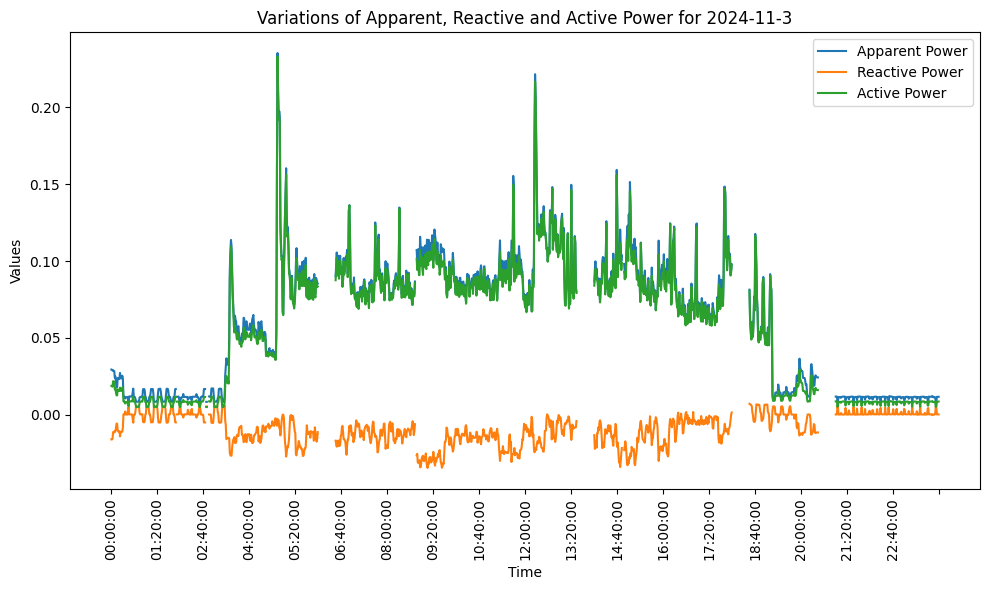

In [118]:
# filtering data for a specific date
specific_date='2024-11-3'
data['date'] = pd.to_datetime(data['date'])
data_filtered = data[data['date'].dt.date == pd.to_datetime(specific_date).date()]
# Plotting the data for the specific date
plt.figure(figsize=(10, 6))

plt.plot(data_filtered['time'], data_filtered['Eapp'], label='Apparent Power')
plt.plot(data_filtered['time'], data_filtered['Ereac'], label='Reactive Power')
plt.plot(data_filtered['time'], data_filtered['Eact'], label='Active Power')

plt.xlabel('Time')
plt.ylabel('Values')
plt.title(f'Variations of Apparent, Reactive and Active Power for {specific_date}')
plt.legend()

# Display the plot
plt.xticks(rotation=90)

# Limit the number of x-axis ticks
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='lower', nbins=24))
plt.tight_layout()
plt.show()

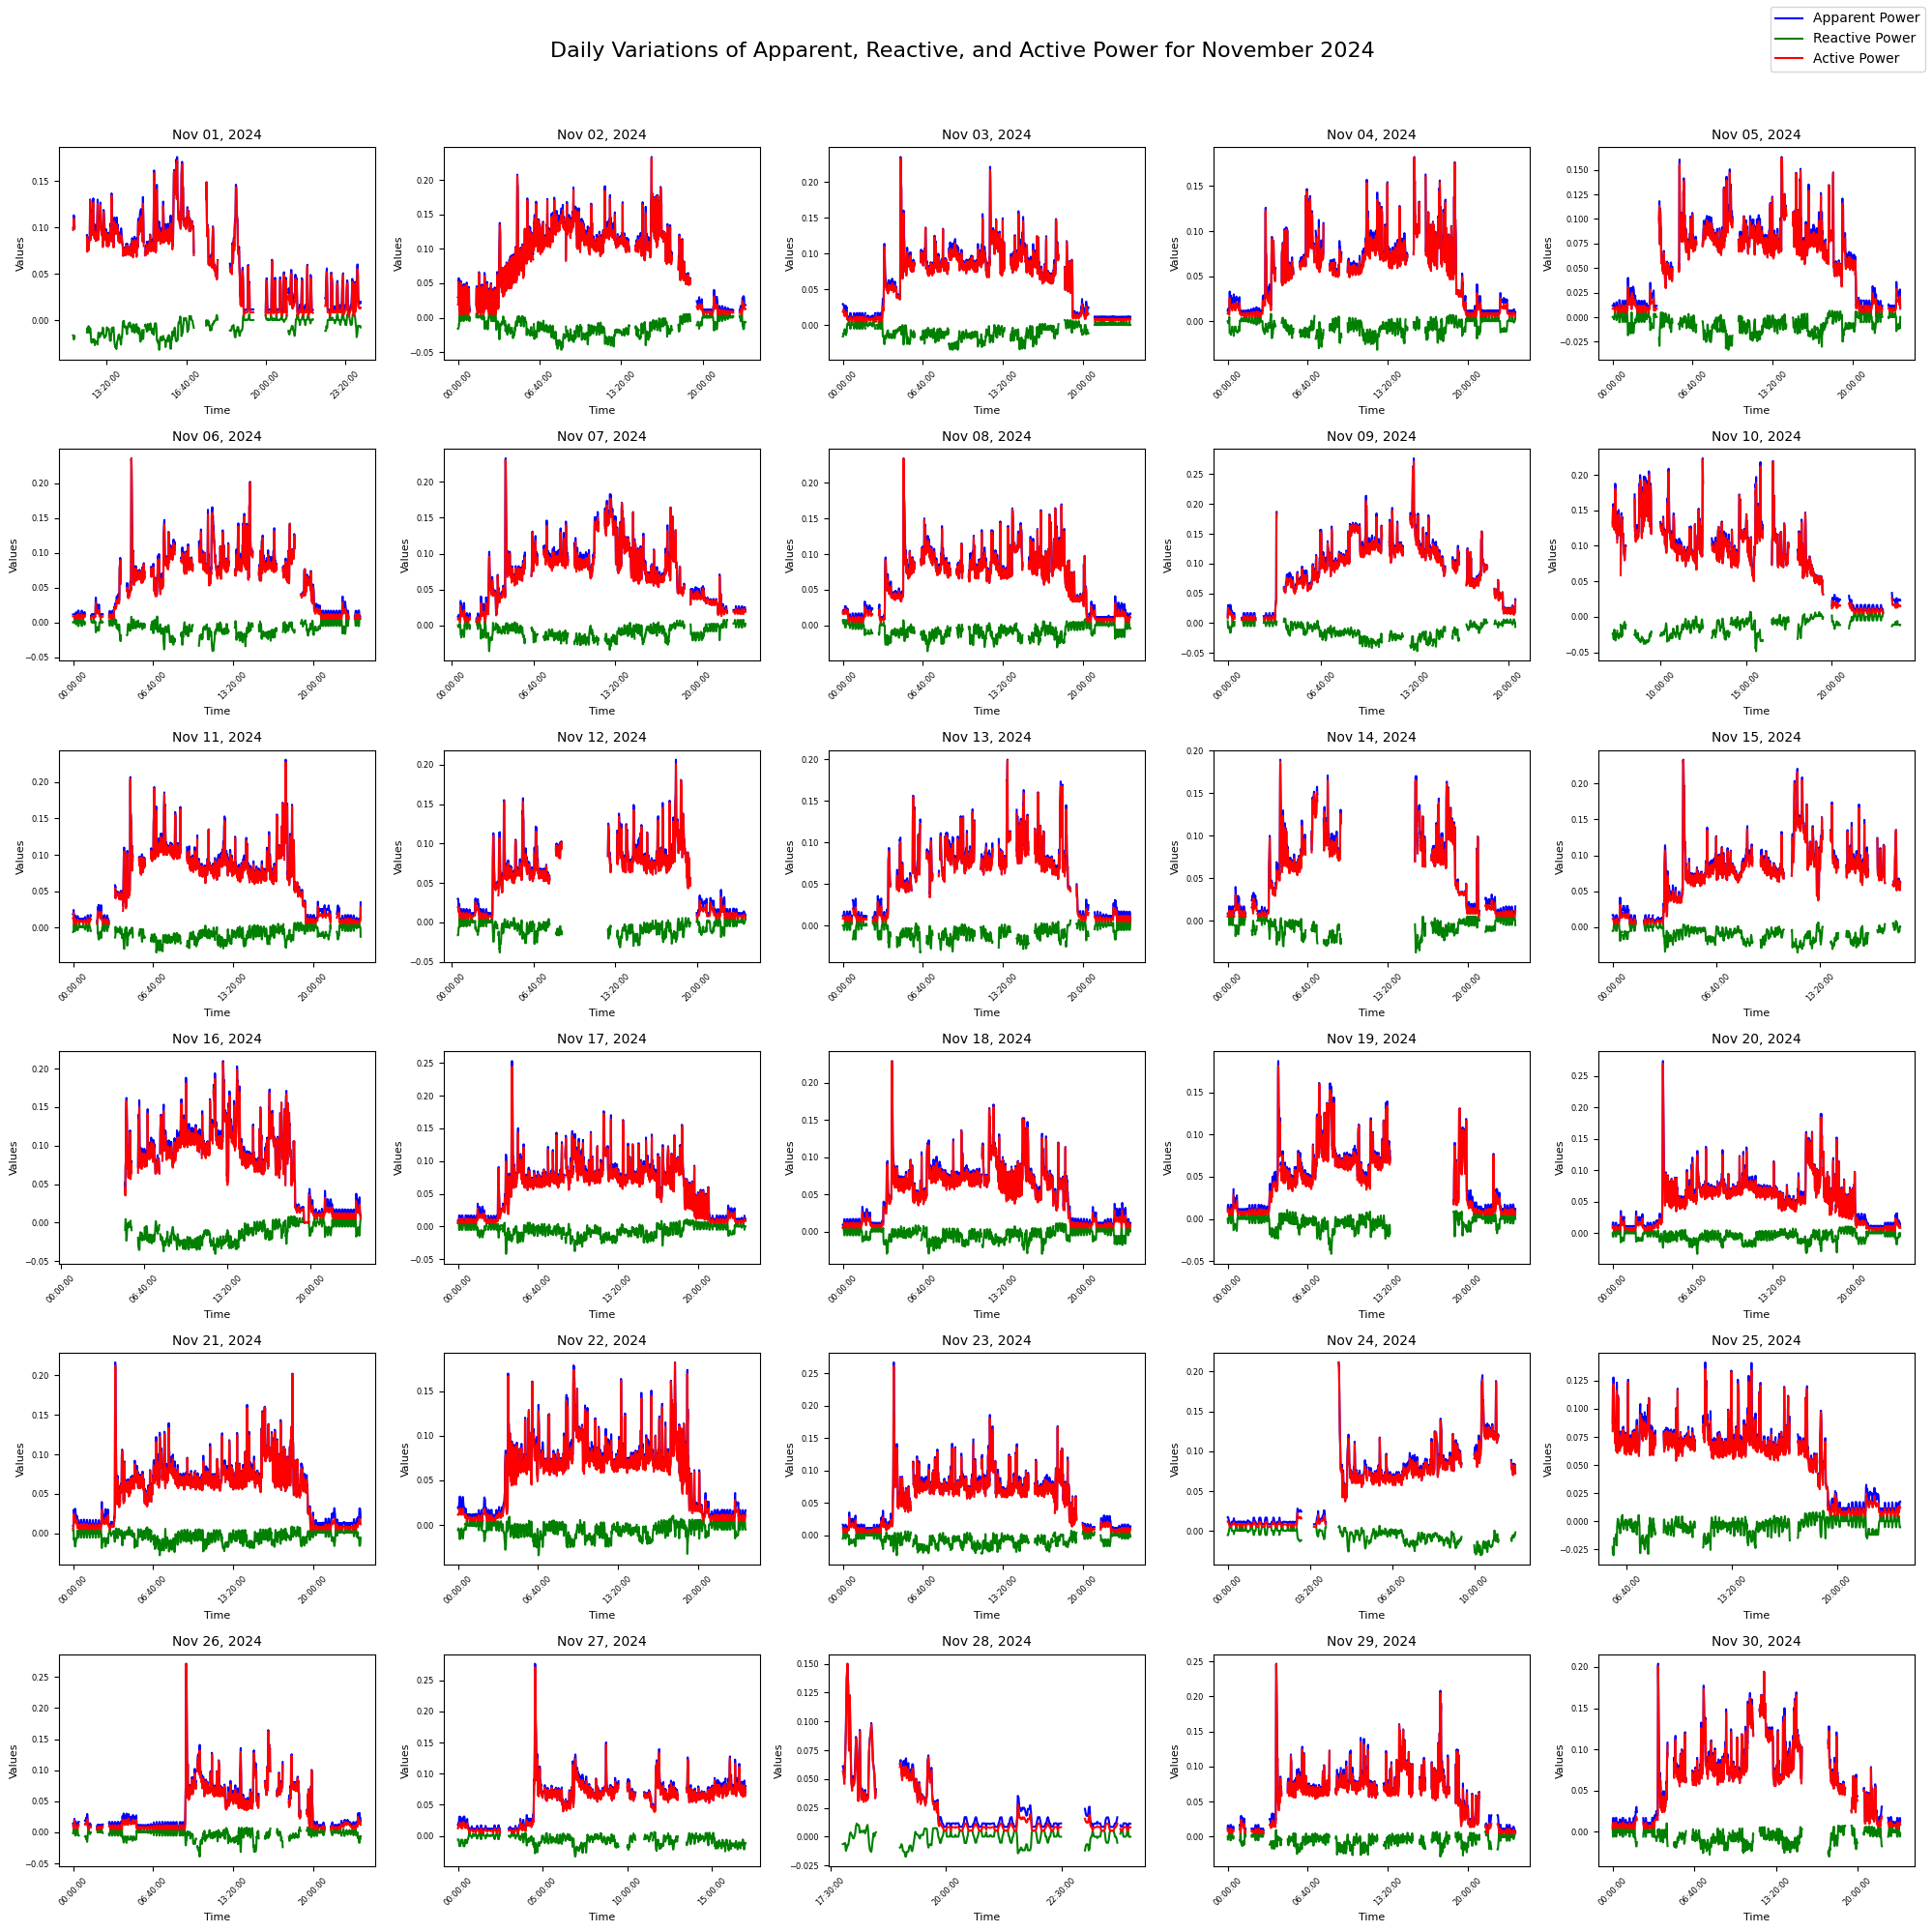

In [119]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

# Ensure the 'date' column is datetime
data['date'] = pd.to_datetime(data['date'])

# Create a figure with subplots for each day
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(20, 20))  # 6 rows, 5 columns for 30 days
fig.suptitle('Daily Variations of Apparent, Reactive, and Active Power for November 2024', fontsize=16)

# Generate plots for each day
start_date = pd.to_datetime('2024-11-01')
end_date = pd.to_datetime('2024-11-30')

current_axes = axes.flatten()

for i, single_date in enumerate(pd.date_range(start=start_date, end=end_date)):
    # Filter data for the specific date
    data_filtered = data[data['date'].dt.date == single_date.date()]
    
    # Get the current subplot
    ax = current_axes[i]
    
    # Plot the data
    ax.plot(data_filtered['time'], data_filtered['Eapp'], label='Apparent Power', color='blue')
    ax.plot(data_filtered['time'], data_filtered['Ereac'], label='Reactive Power', color='green')
    ax.plot(data_filtered['time'], data_filtered['Eact'], label='Active Power', color='red')
    
    # Title and formatting for the subplot
    ax.set_title(single_date.strftime('%b %d, %Y'), fontsize=10)
    ax.set_xlabel('Time', fontsize=8)
    ax.set_ylabel('Values', fontsize=8)
    ax.tick_params(axis='x', labelsize=6, rotation=45)
    ax.tick_params(axis='y', labelsize=6)
    
    # Limit the number of x-axis ticks
    ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='lower', nbins=4))

# Adjust layout and add a legend
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=10)

# Display the plot
plt.show()


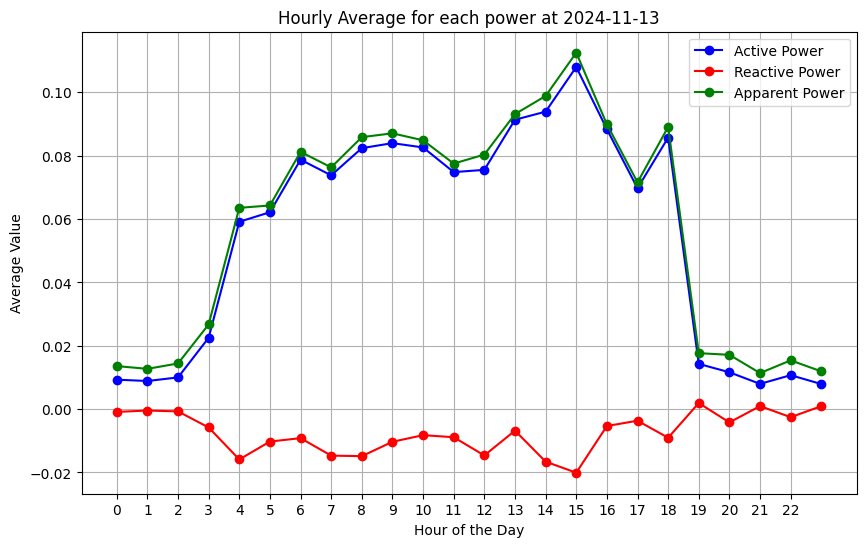

In [35]:
# To check an approximate hourly variation
# Specify the date you want to plot
specified_date = '2024-11-13'

# Step 1: Filter the data based on the specified date
filtered_data = data[data['date'] == specified_date]

# Step 2: Group by the hour and calculate the average for each hour
hourly_avg = filtered_data.groupby(['hour'])[['Eact','Ereac','Eapp']].mean()

# Step 3: Plot the hourly average for the specified date without consideration on number of data points
plt.figure(figsize=(10, 6))
plt.plot(hourly_avg.index, hourly_avg['Eact'], marker='o', linestyle='-', color='b', label='Active Power')
plt.plot(hourly_avg.index, hourly_avg['Ereac'], marker='o', linestyle='-', color='r', label='Reactive Power')
plt.plot(hourly_avg.index, hourly_avg['Eapp'], marker='o', linestyle='-', color='g', label='Apparent Power')

# Adding titles and labels
plt.title(f'Hourly Average for each power at {specified_date}')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Value')
plt.xticks(range(23))  # Ensure all hours (0-23) are displayed on the x-axis
plt.grid(True)
plt.legend()
plt.show()

                          Eact     Ereac      Eapp
month weekday_number                              
10    0               0.056036 -0.007742  0.059612
      1               0.059019 -0.008996  0.062470
      2               0.065637 -0.010266  0.069134
      3               0.066250 -0.011868  0.070481
      4               0.083253 -0.017330  0.088360
      5               0.094373 -0.018175  0.098653
      6               0.066994 -0.012358  0.070801
11    0               0.053244 -0.005579  0.056538
      1               0.046681 -0.004995  0.050237
      2               0.052994 -0.006270  0.056473
      3               0.054337 -0.005670  0.057873
      4               0.057011 -0.006222  0.060352
      5               0.069806 -0.010127  0.073482
      6               0.063639 -0.008401  0.067063
12    0               0.030580 -0.004227  0.034237
      6               0.060131 -0.006372  0.063659


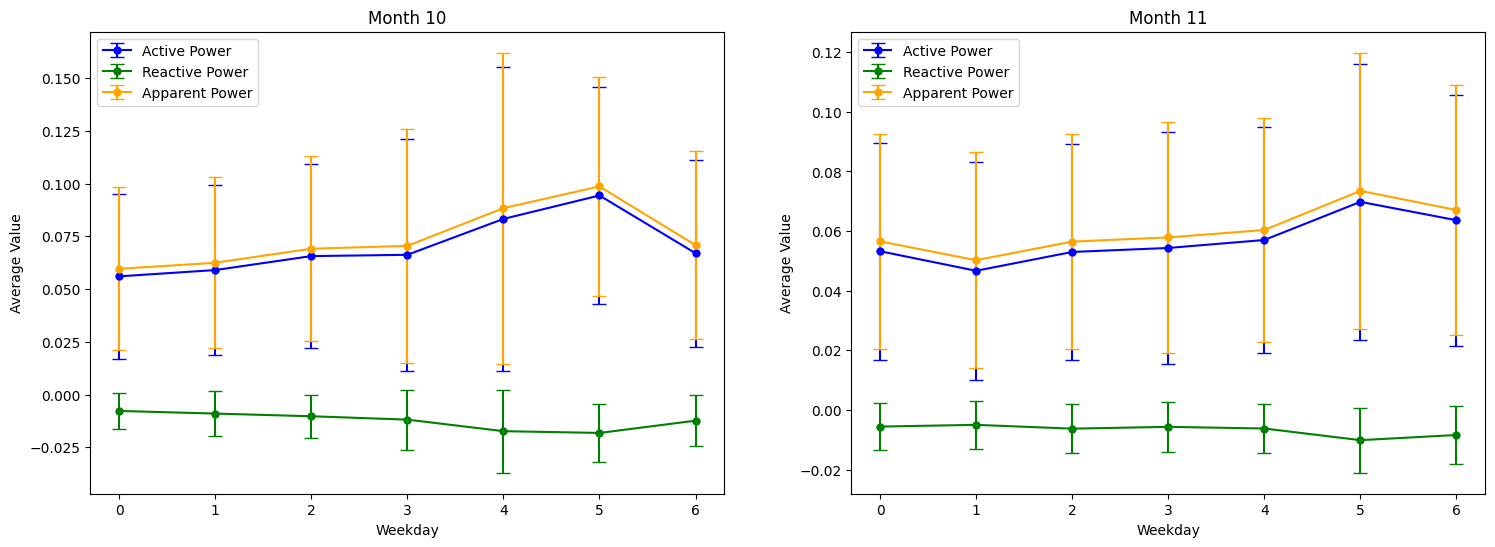

In [37]:
# Group the data by month and weekday, calculating the mean and standard deviation (for error bars)
grouped_data_mean = data.groupby(['month', 'weekday_number'])[['Eact','Ereac','Eapp']].mean()
print(grouped_data_mean)
grouped_data_std = data.groupby(['month', 'weekday_number'])[['Eact','Ereac','Eapp']].std()

unique_months = data['month'].unique()
unique_months = np.delete(unique_months,2) #dropping the last one because we dont have data for 12th month                                                                            
# Create a 1xN grid for subplots where N is the number of unique months
fig, axs = plt.subplots(1, len( unique_months), figsize=(18, 6))

# Loop through each unique month and plot with error bars
for i, month in enumerate(unique_months):
    # Filter the data for the given month
    monthly_data_mean = grouped_data_mean.loc[month]
    monthly_data_std = grouped_data_std.loc[month]
    
    # Plot the mean values with error bars (standard deviation)
    axs[i].errorbar(monthly_data_mean.index, monthly_data_mean['Eact'], 
                    yerr=monthly_data_std['Eact'], label='Active Power', color='blue', 
                    marker='o', markersize=5, capsize=5)
    
    axs[i].errorbar(monthly_data_mean.index, monthly_data_mean['Ereac'], 
                    yerr=monthly_data_std['Ereac'], label='Reactive Power', color='green', 
                    marker='o', markersize=5, capsize=5)
    
    axs[i].errorbar(monthly_data_mean.index, monthly_data_mean['Eapp'], 
                    yerr=monthly_data_std['Eapp'], label='Apparent Power', color='orange', 
                    marker='o', markersize=5, capsize=5)

    # Set the title and labels for the subplot
    axs[i].set_title(f'Month {month}')
    axs[i].set_xlabel('Weekday')
    axs[i].set_ylabel('Average Value')
    axs[i].legend()

# Show the plot
plt.show()

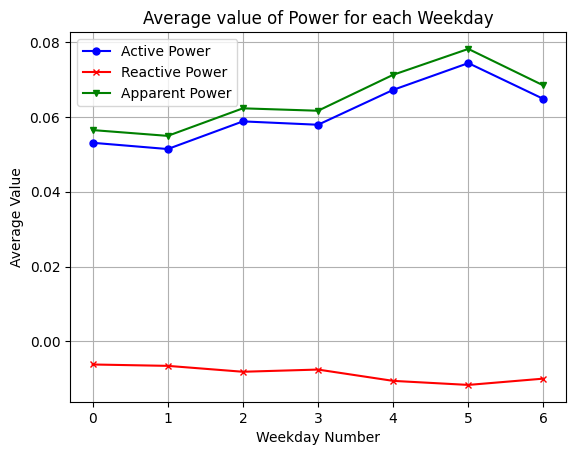

In [15]:
# grouping data by mean to see how the power varies in general for weekdays
grouped_data2 = data.groupby(['weekday_number'])[['Eact','Ereac','Eapp']].mean()
plt.plot(grouped_data2['Eact'], label='Active Power', color='blue', marker='o', markersize=5)
plt.plot(grouped_data2['Ereac'], label='Reactive Power', color='red', marker='x', markersize=5)
plt.plot(grouped_data2['Eapp'], label='Apparent Power', color='green', marker='v', markersize=5)
plt.title(f'Average value of Power for each Weekday')
plt.xlabel('Weekday Number')
plt.ylabel('Average Value')
plt.grid(True)
plt.legend()
plt.show()

In [16]:
# Extract date column and variables
def trend(data,target_day,target_hour,target_min):
    
    # filter data based on hour, minute and weekday_number values giving new data
    filtered_data = data[(data['hour'] == target_hour) & (data['minute'] == target_min) & (data['weekday_number'] == target_day)]
    

    # Filling missing values NA with 0
    filtered_data_filled = filtered_data.fillna(0)
    print("Filtered Data (After Filling Missing Values):")
    display(filtered_data_filled)
    
    # making string arrays for mapping
    dates = filtered_data_filled['date']
    variables = ['Eact', 'Ereac', 'Eapp']
    color_map = {'Eact': 'blue', 'Ereac': 'green', 'Eapp': 'red'}  # Map variable to color

    fig, ax = plt.subplots(figsize=(10, 6))

    # Loop through variables and plot each separately
    for var in variables:
        # Masking non-zero values of the current variable
        is_non_zero = filtered_data_filled[var] != 0
        x_values = dates[is_non_zero]  # we weould need to fill up the non zero dates and make prediction for them 
        y_values = filtered_data_filled[var][is_non_zero]
        c = [color_map[var]] * len(x_values)  # Single color for all points of this variable

        # Scatter plot
        ax.scatter(x_values, y_values, label=f'{var} (non-zero)', color=c, marker='o')

        # Mask for zero values
        is_zero = filtered_data_filled[var] == 0
        x_zero_values = dates[is_zero]
        y_zero_values = filtered_data_filled[var][is_zero]
        c_zero = [color_map[var]] * len(x_zero_values)  # Single color for zero values

        # Scatter plot for zero values with a cross marker
        ax.scatter(x_zero_values, y_zero_values, label=f'{var} (zero)', color=c_zero, marker='x')
        
        # Customize ticks to show only major gridlines at the start of each week
        ax.xaxis.set_major_locator(mdates.WeekdayLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%A, %d-%b-%Y'))

    plt.xlabel('Date')
    plt.ylabel('Variable Value in kilo units')
    plt.title(f'Variable Trends at {target_hour}:{target_min} on Weekday {target_day}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Filtered Data (After Filling Missing Values):


,id,virtual_meter_id,time,Eact1,Eact2,Eact3,Eact,Eapp1,Eapp2,Eapp3,Eapp,Ereac1,Ereac2,Ereac3,Ereac,date,hour,minute,month,weekday_number
time_dt,,,,,,,,,,,,,,,,,,,,
2024-10-15,134731486.0,GUR001_6907_a007,00:00:00,0.018527,0.000241,0.000016,0.018785,0.026531,0.001231,0.001595,0.029357,-0.018990,0.001207,0.001595,-0.016188,2024-10-15,0,0,10,1
2024-10-22,139605330.0,GUR001_6907_a007,00:00:00,0.011206,0.000237,0.000028,0.011472,0.013636,0.001247,0.001622,0.016505,-0.007769,0.001224,0.001622,-0.004923,2024-10-22,0,0,10,1
2024-10-29,0.0,0,00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-10-29,0,0,10,1
2024-11-05,139993793.0,GUR001_6907_a007,00:00:00,0.008349,0.000240,0.000028,0.008617,0.008753,0.001263,0.001638,0.011653,-0.002627,0.001240,0.001637,0.000250,2024-11-05,0,0,11,1
2024-11-12,0.0,0,00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-11-12,0,0,11,1
2024-11-19,140750012.0,GUR001_6907_a007,00:00:00,0.008262,0.000244,0.000025,0.008530,0.008684,0.001263,0.001611,0.011559,-0.002675,0.001240,0.001611,0.000176,2024-11-19,0,0,11,1
2024-11-26,140864767.0,GUR001_6907_a007,00:00:00,0.010226,0.000073,0.000025,0.010324,0.011225,0.001181,0.001650,0.014057,-0.004363,0.001179,0.001650,-0.001534,2024-11-26,0,0,11,1


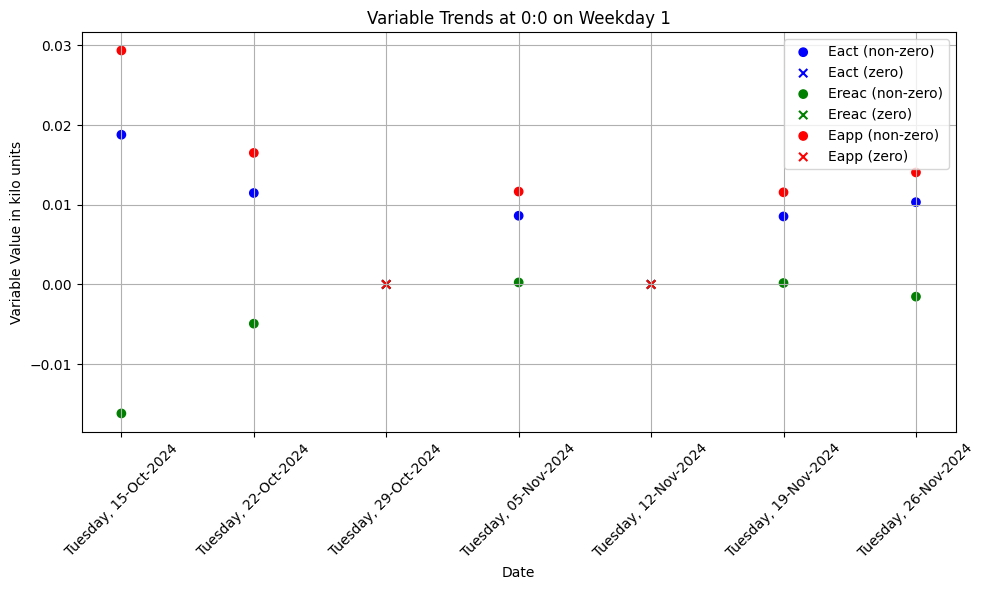

In [38]:
# 0(Monday)-6(Sunday) for day, 0-23 for hour and 0-59 for minutes
target_day = 1
target_hour = 0 
target_min = 0
trend(data,target_day,target_hour,target_min)

In [18]:
# Spliting test and train data and filling na value with 0
test_data = data[data['month'] == 12]  # Test data: December (month = 12)
test_data = test_data.fillna(0)
train_data = data[data['month'].isin([10, 11])]  # Training data: October and November
train_data = train_data.fillna(0)
# to increase the test data taking data from last 4 days of October and moving it to test_data
october_last_days = train_data[(train_data['date'] >= '2024-10-28') & (train_data['date'] <= '2024-10-31')]
test_data = pd.concat([test_data, october_last_days], ignore_index=False)
train_data = train_data[~((train_data['date'] >= '2024-10-28') & (train_data['date'] <= '2024-10-31'))]
display(test_data)
display(train_data)

,id,virtual_meter_id,time,Eact1,Eact2,Eact3,Eact,Eapp1,Eapp2,Eapp3,Eapp,Ereac1,Ereac2,Ereac3,Ereac,date,hour,minute,month,weekday_number
time_dt,,,,,,,,,,,,,,,,,,,,
2024-12-01 00:00:00,0.0,0,00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-12-01,0,0,12,6
2024-12-01 00:01:00,0.0,0,00:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-12-01,0,1,12,6
2024-12-01 00:02:00,0.0,0,00:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-12-01,0,2,12,6
2024-12-01 00:03:00,0.0,0,00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-12-01,0,3,12,6
2024-12-01 00:04:00,0.0,0,00:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-12-01,0,4,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31 23:55:00,0.0,0,23:55:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-31,23,55,10,6
2024-10-31 23:56:00,0.0,0,23:56:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-31,23,56,10,6
2024-10-31 23:57:00,0.0,0,23:57:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-10-31,23,57,10,6


,id,virtual_meter_id,time,Eact1,Eact2,Eact3,Eact,Eapp1,Eapp2,Eapp3,Eapp,Ereac1,Ereac2,Ereac3,Ereac,date,hour,minute,month,weekday_number
time_dt,,,,,,,,,,,,,,,,,,,,
2024-10-10 20:51:00,134706361.0,GUR001_6907_a007,20:51:00,0.038820,0.000534,0.002151,0.041506,0.039529,0.004173,0.004376,0.048079,-0.007452,0.004139,0.003811,0.000497,2024-10-10,20,51,10,3
2024-10-10 20:52:00,134706362.0,GUR001_6907_a007,20:52:00,0.038733,0.000534,0.002151,0.041417,0.039445,0.004174,0.004371,0.047991,-0.007463,0.004140,0.003805,0.000482,2024-10-10,20,52,10,3
2024-10-10 20:53:00,134706363.0,GUR001_6907_a007,20:53:00,0.038841,0.000536,0.002150,0.041527,0.039542,0.004189,0.004369,0.048101,-0.007412,0.004155,0.003804,0.000546,2024-10-10,20,53,10,3
2024-10-10 20:54:00,134706364.0,GUR001_6907_a007,20:54:00,0.038403,0.000535,0.002150,0.041089,0.039107,0.004190,0.004372,0.047669,-0.006708,0.004156,0.003807,0.001256,2024-10-10,20,54,10,3
2024-10-10 20:55:00,134706365.0,GUR001_6907_a007,20:55:00,0.022849,0.000536,0.000987,0.024372,0.024770,0.004194,0.003945,0.032909,0.009425,0.004160,0.003714,0.017299,2024-10-10,20,55,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30 23:55:00,0.0,0,23:55:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-11-30,23,55,11,5
2024-11-30 23:56:00,0.0,0,23:56:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-11-30,23,56,11,5
2024-11-30 23:57:00,0.0,0,23:57:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2024-11-30,23,57,11,5


In [19]:
# making a original copy of train data and making their train_data1/test_data1 variation with all non zero values 
train_data_copy=train_data
train_data1 = train_data[train_data['virtual_meter_id'] !=0]
test_data1 = test_data[test_data['virtual_meter_id'] !=0]
# using non zero values to compute averae at each possible time instance depending on day of the week, hour and minute
avg_value = train_data1.groupby(['weekday_number', 'hour', 'minute'])[['Eact', 'Ereac', 'Eapp']].mean()
display(train_data1)
display(test_data1)
display(avg_value)

,id,virtual_meter_id,time,Eact1,Eact2,Eact3,Eact,Eapp1,Eapp2,Eapp3,Eapp,Ereac1,Ereac2,Ereac3,Ereac,date,hour,minute,month,weekday_number
time_dt,,,,,,,,,,,,,,,,,,,,
2024-10-10 20:51:00,134706361.0,GUR001_6907_a007,20:51:00,0.038820,0.000534,0.002151,0.041506,0.039529,0.004173,0.004376,0.048079,-0.007452,0.004139,0.003811,0.000497,2024-10-10,20,51,10,3
2024-10-10 20:52:00,134706362.0,GUR001_6907_a007,20:52:00,0.038733,0.000534,0.002151,0.041417,0.039445,0.004174,0.004371,0.047991,-0.007463,0.004140,0.003805,0.000482,2024-10-10,20,52,10,3
2024-10-10 20:53:00,134706363.0,GUR001_6907_a007,20:53:00,0.038841,0.000536,0.002150,0.041527,0.039542,0.004189,0.004369,0.048101,-0.007412,0.004155,0.003804,0.000546,2024-10-10,20,53,10,3
2024-10-10 20:54:00,134706364.0,GUR001_6907_a007,20:54:00,0.038403,0.000535,0.002150,0.041089,0.039107,0.004190,0.004372,0.047669,-0.006708,0.004156,0.003807,0.001256,2024-10-10,20,54,10,3
2024-10-10 20:55:00,134706365.0,GUR001_6907_a007,20:55:00,0.022849,0.000536,0.000987,0.024372,0.024770,0.004194,0.003945,0.032909,0.009425,0.004160,0.003714,0.017299,2024-10-10,20,55,10,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-30 23:25:00,141102111.0,GUR001_6907_a007,23:25:00,0.007686,0.000246,0.000022,0.007954,0.008443,0.001273,0.001621,0.011337,-0.003495,0.001249,0.001621,-0.000625,2024-11-30,23,25,11,5
2024-11-30 23:26:00,141102112.0,GUR001_6907_a007,23:26:00,0.007719,0.000247,0.000022,0.007988,0.008442,0.001277,0.001618,0.011337,-0.003418,0.001253,0.001618,-0.000548,2024-11-30,23,26,11,5
2024-11-30 23:27:00,141102113.0,GUR001_6907_a007,23:27:00,0.010637,0.000246,0.000020,0.010904,0.013316,0.001276,0.001621,0.016214,-0.007945,0.001252,0.001621,-0.005072,2024-11-30,23,27,11,5


,id,virtual_meter_id,time,Eact1,Eact2,Eact3,Eact,Eapp1,Eapp2,Eapp3,Eapp,Ereac1,Ereac2,Ereac3,Ereac,date,hour,minute,month,weekday_number
time_dt,,,,,,,,,,,,,,,,,,,,
2024-12-01 02:14:00,141106878.0,GUR001_6907_a007,02:14:00,0.023982,0.000245,0.000023,0.024251,0.027817,0.001291,0.001654,0.030761,-0.014001,0.001267,0.001654,-0.011080,2024-12-01,2,14,12,6
2024-12-01 02:15:00,141106879.0,GUR001_6907_a007,02:15:00,0.021345,0.000242,0.000024,0.021610,0.026901,0.001279,0.001645,0.029824,-0.016371,0.001256,0.001644,-0.013471,2024-12-01,2,15,12,6
2024-12-01 02:16:00,141106880.0,GUR001_6907_a007,02:16:00,0.016864,0.000240,0.000026,0.017130,0.022708,0.001277,0.001658,0.025644,-0.015166,0.001255,0.001658,-0.012254,2024-12-01,2,16,12,6
2024-12-01 02:17:00,141106881.0,GUR001_6907_a007,02:17:00,0.016265,0.000239,0.000027,0.016530,0.021999,0.001275,0.001661,0.024935,-0.014789,0.001252,0.001661,-0.011876,2024-12-01,2,17,12,6
2024-12-01 02:18:00,141106882.0,GUR001_6907_a007,02:18:00,0.016762,0.000243,0.000026,0.017032,0.022394,0.001283,0.001659,0.025336,-0.014796,0.001260,0.001659,-0.011878,2024-12-01,2,18,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-31 04:55:00,139745610.0,GUR001_6907_a007,04:55:00,0.026109,0.009991,0.007986,0.044086,0.027916,0.010040,0.007987,0.045943,-0.009881,-0.000990,-0.000066,-0.010937,2024-10-31,4,55,10,6
2024-10-31 04:56:00,139745611.0,GUR001_6907_a007,04:56:00,0.025991,0.009923,0.008065,0.043978,0.027797,0.009963,0.008065,0.045825,-0.009856,-0.000889,-0.000046,-0.010791,2024-10-31,4,56,10,6
2024-10-31 04:57:00,139745612.0,GUR001_6907_a007,04:57:00,0.029498,0.009947,0.007793,0.047238,0.032111,0.010011,0.007793,0.049915,-0.012640,-0.001128,0.000047,-0.013721,2024-10-31,4,57,10,6


Eact     Ereac      Eapp
weekday_number hour minute                              
0              0    0       0.007850  0.001033  0.011710
                    1       0.007683  0.001238  0.011524
                    2       0.008691  0.000713  0.012631
                    3       0.009622  0.001044  0.013253
                    4       0.007937  0.002056  0.011103
...                              ...       ...       ...
6              23   55      0.009997 -0.002238  0.014478
                    56      0.009805 -0.001844  0.013853
                    57      0.009279 -0.001022  0.013426
                    58      0.008443  0.000062  0.012611
                    59      0.008675 -0.000287  0.012841

[10080 rows x 3 columns]

In [20]:
# below function gives data for a specific instance and also replaces the value at unknown points with average values
def specific_date_data(data,w,h,m):
    s = data[(data['hour'] == h) & (data['minute'] == m) & (data['weekday_number'] == w)]
    r = s[s['id'] != 0]
    s = s[s['id'] == 0]
    s['Eact']=avg_value.loc[(w,h,m), 'Eact']
    s['Ereac']=avg_value.loc[(w,h,m), 'Ereac']
    s['Eapp']=avg_value.loc[(w,h,m), 'Eapp']
    # after changing the 3 energy rows having zero values with average values combining them together.
    t = pd.concat([s, r], ignore_index=False)
    return t
# to update the entire datasheet with average values containing several time instances as row entries
def update_data(data):
    for h in range(24):
        for m in range(60):
            for w in range(7):
                updated_data = specific_date_data(data, w, h, m)
                # Replace the original rows with the updated rows
                data.loc[(data['hour'] == h) & (data['minute'] == m) & (data['weekday_number'] == w) & (data['id'] == 0)] = updated_data.loc[updated_data['id'] == 0]

    return data
# updating train data can be used later...
updated_data = update_data(train_data)

Filtered Data (After Filling Missing Values):


,id,virtual_meter_id,time,Eact1,Eact2,Eact3,Eact,Eapp1,Eapp2,Eapp3,Eapp,Ereac1,Ereac2,Ereac3,Ereac,date,hour,minute,month,weekday_number
time_dt,,,,,,,,,,,,,,,,,,,,
2024-10-14,134704264.0,GUR001_6907_a007,00:00:00,0.004791,0.000248,0.000022,0.005061,0.005480,0.001253,0.001599,0.008332,0.002661,0.001228,0.001599,0.005487,2024-10-14,0,0,10,0
2024-10-21,0.0,0,00:00:00,0.000000,0.000000,0.000000,0.007850,0.000000,0.000000,0.000000,0.011710,0.000000,0.000000,0.000000,0.001033,2024-10-21,0,0,10,0
2024-11-04,139878403.0,GUR001_6907_a007,00:00:00,0.008545,0.000077,0.000028,0.008650,0.008943,0.001204,0.001605,0.011752,-0.002637,0.001201,0.001605,0.000169,2024-11-04,0,0,11,0
2024-11-11,140332853.0,GUR001_6907_a007,00:00:00,0.011932,0.000244,0.000022,0.012198,0.015114,0.001270,0.001629,0.018013,-0.009264,0.001247,0.001629,-0.006388,2024-11-11,0,0,11,0
2024-11-18,140652935.0,GUR001_6907_a007,00:00:00,0.005221,0.000245,0.000027,0.005492,0.005854,0.001281,0.001608,0.008742,0.002001,0.001257,0.001607,0.004865,2024-11-18,0,0,11,0
2024-11-25,0.0,0,00:00:00,0.000000,0.000000,0.000000,0.007850,0.000000,0.000000,0.000000,0.011710,0.000000,0.000000,0.000000,0.001033,2024-11-25,0,0,11,0


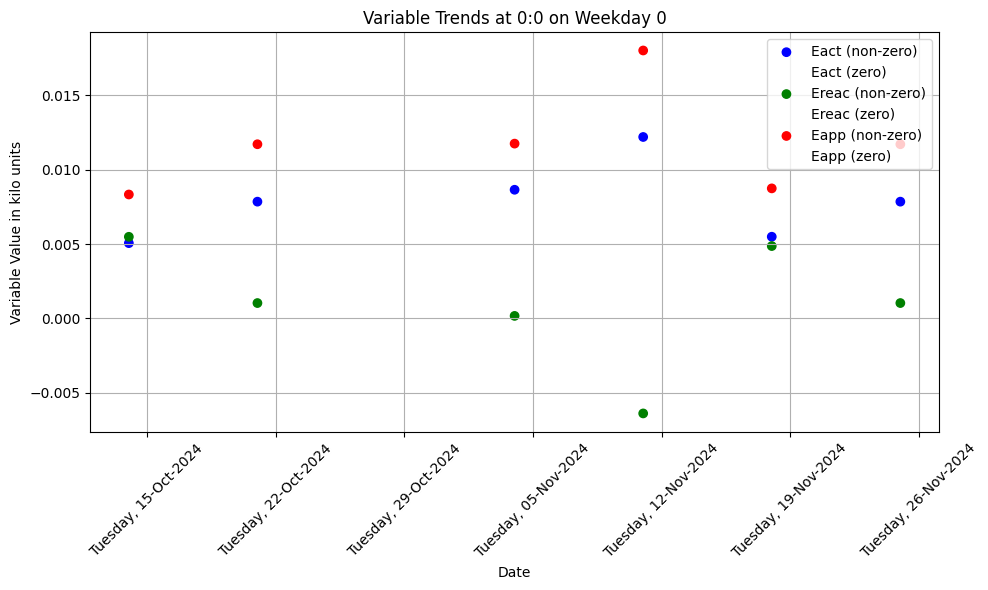

In [21]:
# checking trend for updated data and their should be no cross symbols as they are rpelaced now with average values
trend(updated_data,target_day,target_hour,target_min)
updated_data.to_csv('data_updated.csv',index=True)

In [22]:
if test_data1['id'].nunique() == len(test_data1):
    print("All values in the 'id' column are unique.")

All values in the 'id' column are unique.


In [23]:
# 1 for Eact, 2 for Ereac and 3 for Eapp
# function to compte error around average value approximation. (average value computed for each unique combination for w,h,m)
def error(test_data1):
    c=0.0
    err_1=0.0
    err_2=0.0
    err_3=0.0
    per_err_1=0.0
    per_err_2=0.0
    per_err_3=0.0
    for h in range(24):
        for m in range(60):
            for w in range(7):
                # getting from test_data1(only non zero values) for given combination
                instance_data = test_data1[(test_data1['hour']==h)&(test_data1['minute']==m)&(test_data1['weekday_number']==w)]
                # Group by 'id' and iterate over each group (since id is unique for all values)
                for id_value, group in instance_data.groupby('id'):
                    # Process each row in the group
                    for index, row in group.iterrows():
                        # computing the average absolute error for each type of energy 
                        err_1=np.abs((avg_value.loc[(w,h,m), 'Eact']- row['Eact']) / (row['Eact'])) * 100.0
                        err_2=np.abs((avg_value.loc[(w,h,m), 'Ereac']- row['Ereac']) / (row['Ereac'])) * 100.0
                        err_3=np.abs((avg_value.loc[(w,h,m), 'Eapp']- row['Eapp']) / (row['Eapp'])) * 100.0
                        per_err_1+=err_1 
                        per_err_2+=err_2
                        per_err_3+=err_3 
                        # counter for averaging
                        c=c+1.0
                    err_1=0.0
                    err_2=0.0
                    err_3=0.0
    if(c!=0):
        per_err_1 = (per_err_1)/c
        per_err_2 = (per_err_2)/c
        per_err_3 = (per_err_3)/c
    else:
        return("No such datapoint in dataset")
    return(per_err_1,per_err_2,per_err_3,c)

In [24]:
# for entire test dataset
print(error(test_data1))

(np.float64(47.614999000498365), np.float64(591.0002619826), np.float64(41.5964371959815), 2580.0)


In [25]:
# for a specific instance
def error_instance(test_data2,m,h,w):
    c=0.0
    err_1=0.0
    err_2=0.0
    err_3=0.0
    per_err_1=0.0
    per_err_2=0.0
    per_err_3=0.0
    test_instance_data = specific_date_data(test_data2,w,h,m)
    test_instance_data = test_instance_data[test_instance_data['id'] != 0]
    # Group by 'id' and iterate over each group (since id is unique for all values)
    for id_value, group in test_instance_data.groupby('id'):
        # Process each row in the group
        for index, row in group.iterrows():
            # computing the average absolute error for each type of energy 
            err_1=np.abs((avg_value.loc[(w,h,m), 'Eact']- row['Eact']) / (row['Eact'])) * 100.0
            err_2=np.abs((avg_value.loc[(w,h,m), 'Ereac']- row['Ereac']) / (row['Ereac'])) * 100.0
            err_3=np.abs((avg_value.loc[(w,h,m), 'Eapp']- row['Eapp']) / (row['Eapp'])) * 100.0
            per_err_1+=err_1 
            per_err_2+=err_2
            per_err_3+=err_3 
            # counter for averaging
            c=c+1.0
        err_1=0.0
        err_2=0.0
        err_3=0.0
    if(c!=0):
        per_err_1 = (per_err_1)/c
        per_err_2 = (per_err_2)/c
        per_err_3 = (per_err_3)/c
    else:
        return("No such datapoint in dataset")
    return(per_err_1,per_err_2,per_err_3,c)

error_instance(test_data1,5,5,0)

(np.float64(36.028749517605505),
 np.float64(34.96272269219843),
 np.float64(34.44284177332248),
 1.0)

In [26]:
def error_instance_hourly(test_data3, h, w):
    x = 0.0
    err_1, err_2, err_3 = 0.0, 0.0, 0.0
    avg_err_1, avg_err_2, avg_err_3 = 0.0, 0.0, 0.0
    sum_1, sum_2, sum_3 = 0.0, 0.0, 0.0
    sum1, sum2, sum3 = 0.0, 0.0, 0.0
    for m in range(60):
        test_instance_data = specific_date_data(test_data3, w, h, m)
        test_instance_data = test_instance_data[test_instance_data['id'] != 0]
        if test_instance_data.empty:  # Impute missing data using training averages
            sum_1 += avg_value.loc[(w, h, m), 'Eact']
            sum_2 += avg_value.loc[(w, h, m), 'Ereac']
            sum_3 += avg_value.loc[(w, h, m), 'Eapp']
            sum1 += avg_value.loc[(w, h, m), 'Eact']
            sum2 += avg_value.loc[(w, h, m), 'Ereac']
            sum3 += avg_value.loc[(w, h, m), 'Eapp']
        else:
            # Group by 'id' and iterate over each group (since id is unique for all values)
            for id_value, group in test_instance_data.groupby('id'):
                # Process each row in the group
                for index, row in group.iterrows():
                    # computing the average absolute error for each type of energy
                    err_1 = np.abs((avg_value.loc[(w, h, m), 'Eact'] - row['Eact']) / row['Eact']) * 100.0
                    err_2 = np.abs((avg_value.loc[(w, h, m), 'Ereac'] - row['Ereac']) / row['Ereac']) * 100.0
                    err_3 = np.abs((avg_value.loc[(w, h, m), 'Eapp'] - row['Eapp']) / row['Eapp']) * 100.0
                    # Sum of hourly data from test data for total energy comsumed in 1 hour
                    sum_1 += row['Eact']
                    sum_2 += row['Ereac']
                    sum_3 += row['Eapp']
                    # Sum of hourly data from train data for total energy comsumed in 1 hour
                    sum1 += avg_value.loc[(w, h, m), 'Eact'] 
                    sum2 += avg_value.loc[(w, h, m), 'Ereac'] 
                    sum3 += avg_value.loc[(w, h, m), 'Eapp'] 
                    # summing the errors for finding the average percentage error for each type of error
                    avg_err_1 += err_1
                    avg_err_2 += err_2
                    avg_err_3 += err_3
                    # counter for averaging
                    x += 1.0
    if x != 0:
        # average error in hourly data
        avg_err_1 = avg_err_1 / x
        avg_err_2 = avg_err_2 / x
        avg_err_3 = avg_err_3 / x
        return x, avg_err_1, avg_err_2, avg_err_3, sum_1, sum1, sum_2, sum2, sum_3, sum3
    else:
        return "No such datapoint in dataset"

In [27]:
def hourly_summary(test_data):
    cols = ["h","w","x","%err_Eact","%err_Ereac","%err_Eapp", "Eact_sum_test", "Eact_sum_train", "Ereac_sum_test", "Ereac_sum_train",
      "Eapp_sum_test", "Eapp_sum_train"]
    results = []
    results = pd.DataFrame(columns=cols)
    n = 0 # counter for skipped cases
    # iterating over each hour data
    for h in range (24):
        for w in range (7):
            result = error_instance_hourly (test_data ,h ,w)
            # Check if the result is "No such datapoint in dataset"
            if result == "No such datapoint in dataset":
                n = n + 1
                continue  # Skip to the next iteration
            elif ( ( int ( result [0] ) ) < 30): # Also if number of datapoints are less than 30 we ignore that
                n = n + 1
                continue  # Skip to the next iteration
            else:
                new_row = {
                    "h": h,
                    "w": w,
                    "x": result[0],
                    "%err_Eact": result[1],
                    "%err_Ereac": result[2],
                    "%err_Eapp": result[3],
                    "Eact_sum_test": result[4],
                    "Eact_sum_train": result[5],
                    "Ereac_sum_test": result[6],
                    "Ereac_sum_train": result[7],
                    "Eapp_sum_test": result[8],
                    "Eapp_sum_train": result[9]
                }
                # Appending the new row to the results DataFrame
                results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)
                break;
    return(results,n)
results, n = hourly_summary(test_data1)
display(results)

C:\Users\sansh\AppData\Local\Temp\ipykernel_23848\1008136804.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)


,h,w,x,%err_Eact,%err_Ereac,%err_Eapp,Eact_sum_test,Eact_sum_train,Ereac_sum_test,Ereac_sum_train,Eapp_sum_test,Eapp_sum_train
0,0,0,30.0,48.306851,916.974111,40.966512,0.561811,0.616027,-0.057562,-0.120565,0.813539,0.884430
1,1,0,60.0,44.677954,2315.323794,36.158298,0.462394,0.560278,0.062167,-0.051246,0.676831,0.801750
2,2,0,60.0,43.209228,3976.859011,37.597565,0.538879,0.572832,-0.019864,-0.062414,0.780019,0.813910
3,3,0,60.0,152.656676,402.396777,112.499782,1.459451,2.248553,-0.488805,-0.421503,1.749000,2.493162
4,4,2,30.0,50.714281,61.035959,52.570929,3.299701,3.505791,-0.556525,-0.500273,3.466248,3.743021
5,5,0,59.0,24.041003,207.507177,24.927334,4.557212,3.783764,-0.394231,-0.541876,4.672524,3.967243
6,6,0,30.0,21.974234,204.364205,21.782112,4.684985,4.204093,-0.627883,-0.474004,4.882138,4.397580
7,7,2,60.0,20.832308,129.338481,20.555851,6.049411,4.768813,-0.823991,-0.745992,6.281238,4.981808
8,8,2,30.0,12.263355,188.945598,11.559147,5.095754,4.785851,-0.600616,-0.688817,5.256373,4.971392
9,9,2,60.0,23.327387,39.071039,22.541763,6.758950,5.131694,-1.186643,-0.728323,6.941269,5.318026


Cases when 1 hour duration has either less than 30 data points is 40
Average % Error in hourly data for Eact: 38.21
Average % Error in hourly data for Ereac: 459.45
Average % Error in hourly data for Eapp: 34.58


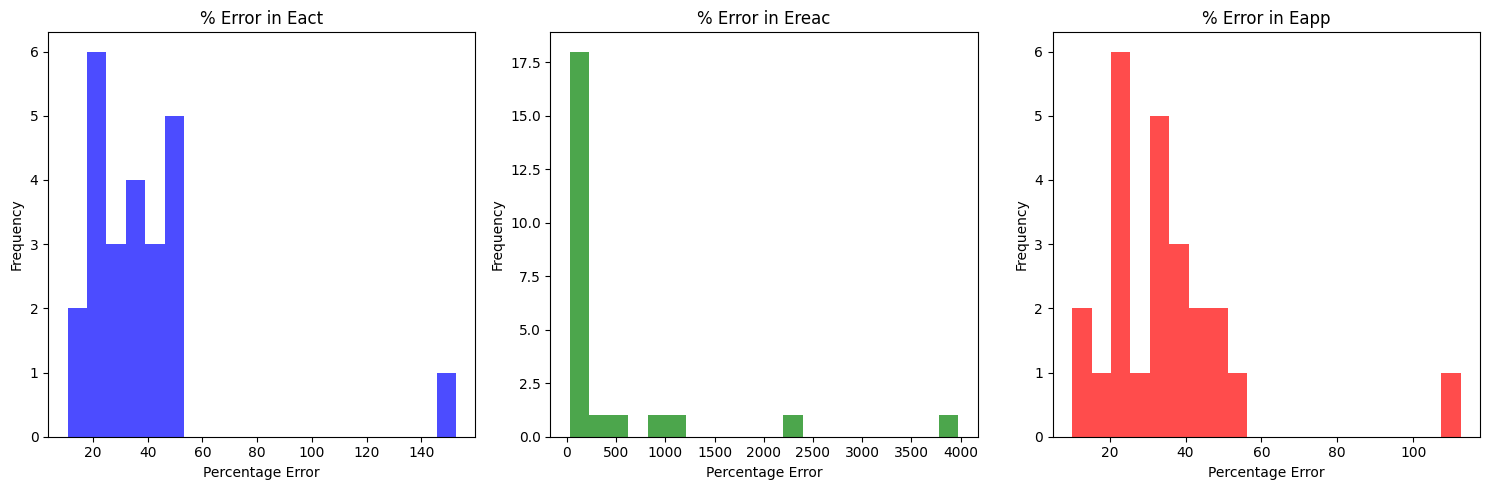

In [28]:
# Function for plotting histograms for percentage errors
def graph_result(result,n):
    
    print(f"Cases when 1 hour duration has either less than 30 data points is {n}")
    
    # Calculate average errors
    avg_err_Eact = result["%err_Eact"].mean()
    avg_err_Ereac = result["%err_Ereac"].mean()
    avg_err_Eapp = result["%err_Eapp"].mean()

    # Display the averages
    print(f"Average % Error in hourly data for Eact: {avg_err_Eact:.2f}")
    print(f"Average % Error in hourly data for Ereac: {avg_err_Ereac:.2f}")
    print(f"Average % Error in hourly data for Eapp: {avg_err_Eapp:.2f}")
    plt.figure(figsize=(15, 5))

    # Histogram for %err_Eact
    plt.subplot(1, 3, 1)
    plt.hist(result["%err_Eact"], bins=20, color='b', alpha=0.7)
    plt.title('% Error in Eact')
    plt.xlabel('Percentage Error')
    plt.ylabel('Frequency')

    # Histogram for %err_Ereac
    plt.subplot(1, 3, 2)
    plt.hist(result["%err_Ereac"], bins=20, color='g', alpha=0.7)
    plt.title('% Error in Ereac')
    plt.xlabel('Percentage Error')
    plt.ylabel('Frequency')

    # Histogram for %err_Eapp
    plt.subplot(1, 3, 3)
    plt.hist(result["%err_Eapp"], bins=20, color='r', alpha=0.7)
    plt.title('% Error in Eapp')
    plt.xlabel('Percentage Error')
    plt.ylabel('Frequency')

    # Adjust layout to prevent overlap
    plt.tight_layout()
    plt.show()
graph_result(results,n)

C:\Users\sansh\AppData\Local\Temp\ipykernel_23848\1008136804.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)


Cases when 1 hour duration has either less than 30 data points is 0
Average % Error in hourly data for Eact: 30.20
Average % Error in hourly data for Ereac: 1196.92
Average % Error in hourly data for Eapp: 27.52


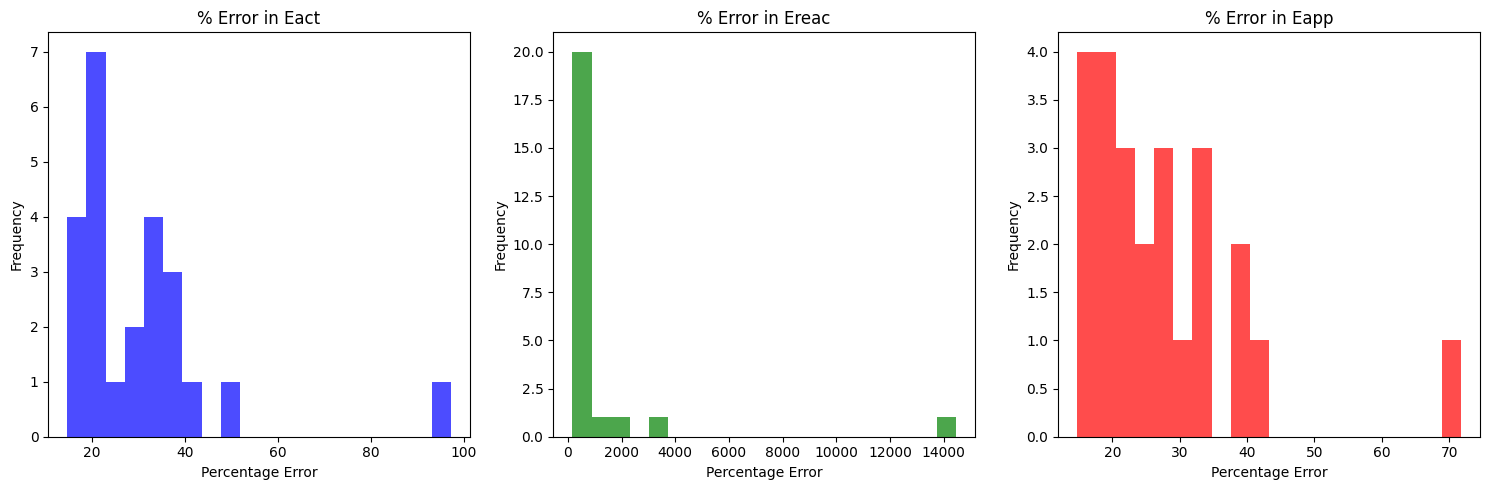

In [29]:
results1, n1 = hourly_summary(train_data1)
graph_result(results1,n1)

C:\Users\sansh\AppData\Local\Temp\ipykernel_23848\1008136804.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)


Cases when 1 hour duration has either less than 30 data points is 0
Average % Error in hourly data for Eact: 30.20
Average % Error in hourly data for Ereac: 1196.92
Average % Error in hourly data for Eapp: 27.52


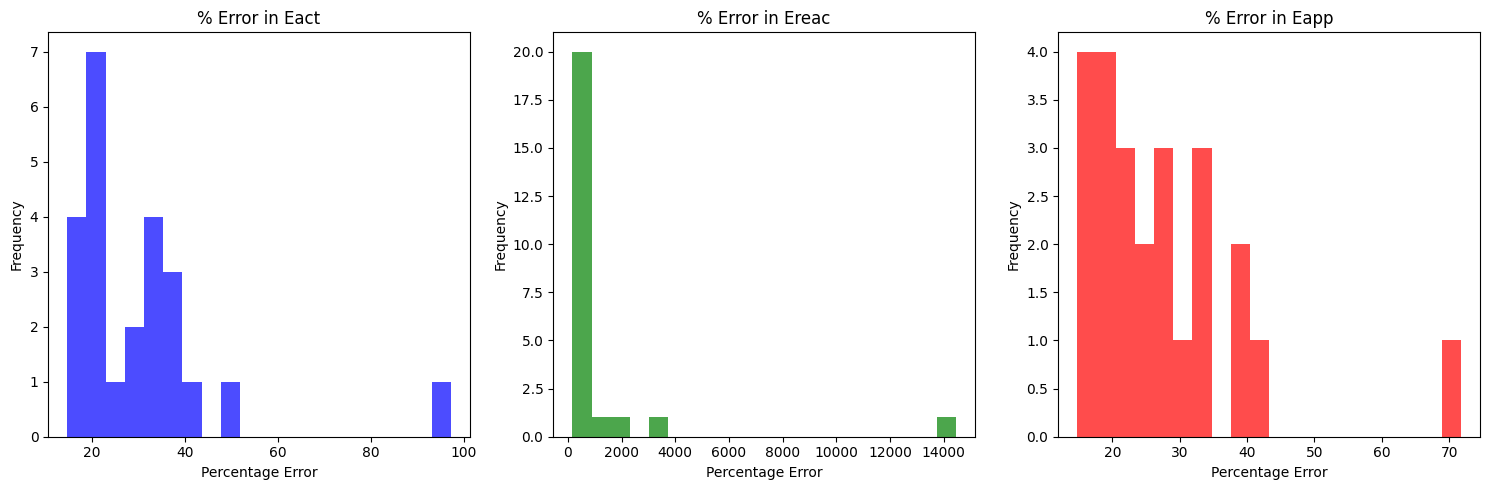

In [30]:
results2, n2 = hourly_summary(updated_data)
graph_result(results2,n2)

In [31]:
# Finding MAE, RMSE, R^2 score for hourly test data using the average metric
def metrics(data):
    results,n = hourly_summary(data)
    Eact_true=results["Eact_sum_test"]
    Eact_pred=results["Eact_sum_train"]
    Eapp_true=results["Eapp_sum_test"]
    Eapp_pred=results["Eapp_sum_train"]
    Ereac_true=results["Ereac_sum_test"]
    Ereac_pred=results["Ereac_sum_train"]
    mae_act = np.mean(np.abs(Eact_true - Eact_pred))
    rmse_act = np.sqrt(np.mean((Eact_true - Eact_pred)**2))
    mae_app = np.mean(np.abs(Eapp_true - Eapp_pred))
    rmse_app = np.sqrt(np.mean((Eapp_true - Eapp_pred)**2))
    mae_reac = np.mean(np.abs(Ereac_true - Ereac_pred))
    rmse_reac = np.sqrt(np.mean((Ereac_true - Ereac_pred)**2))
    r2_act = r2_score(Eact_true, Eact_pred)
    r2_app = r2_score(Eapp_true, Eapp_pred)
    r2_reac = r2_score(Ereac_true, Ereac_pred)
    print(f"RMSE and MAE for Active Power is {rmse_act} and {mae_act}")
    print(f"RMSE and MAE for Reactive Power is {rmse_reac} and {mae_reac}")
    print(f"RMSE and MAE for Apparent Power is {rmse_app} and {mae_app}")
    print("R-squared score for Active Power:", r2_act)
    print("R-squared score for Reactive Power:", r2_reac)
    print("R-squared score for Apparent Power:", r2_app)
metrics(test_data1)

C:\Users\sansh\AppData\Local\Temp\ipykernel_23848\1008136804.py:34: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([new_row])], ignore_index=True)


RMSE and MAE for Active Power is 1.407301736892477 and 1.031211133651248
RMSE and MAE for Reactive Power is 0.4152828672066261 and 0.2966719342433359
RMSE and MAE for Apparent Power is 1.4195113173358853 and 1.0424790616951318
R-squared score for Active Power: 0.7290851998055712
R-squared score for Reactive Power: 0.38916621910619387
R-squared score for Apparent Power: 0.7213374170588762


In [32]:
# Using One hot encoding for weekday data and for hourly data making it cyclic variable

In [33]:
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

def train_ml_model(train_data: pd.DataFrame, test_data: pd.DataFrame):
    # Features and target variables
    features = ['hour', 'minute', 'weekday_number']
    targets = ['Eact', 'Eapp']
    
    # Models to evaluate
    models_to_evaluate = {
        "Random Forest": RandomForestRegressor(n_estimators=5,random_state=40),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=5,learning_rate=0.1, random_state=40),
        "Linear Regression": LinearRegression(),
        "Support Vector Regressor": SVR(kernel='sigmoid', C=1.0, epsilon=0.1),
        "Decision Tree": DecisionTreeRegressor(random_state=40),
        "XGBoost": XGBRegressor(n_estimators=5, learning_rate=0.1,random_state=40)
    }
        
    # scaler = StandardScaler()
    scaler = MinMaxScaler()
    
    results = []
    
    # Loop through each model
    for name, model in models_to_evaluate.items():
        for target in targets:
            # Prepare training and test data
            X_train = train_data[features]
            y_train = train_data[target]
            X_test = test_data[features]
            y_test = test_data[target]
            
            # Scale the features
            X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
            X_test_scaled = scaler.transform(X_test)        # Transform test data using the same scaler
                                         
            # Fit the model
            model.fit(X_train_scaled, y_train)

            # Make predictions
            y_pred = model.predict(X_test_scaled)

            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Calculate percentage error
            percent_error = (abs(y_test - y_pred) / (abs(y_pred)))*100
            avg_percent_error = percent_error.mean()  
            
            # Append the results to the list
            results.append({
                "Model": name,
                "MSE": mse,
                "MAE": mae,
                "R²": r2,
                "Avg Percentage Error": avg_percent_error
            })

    # Convert results into a DataFrame for better visualization
    results_df = pd.DataFrame(results)

    # Return the results DataFrame
    return results_df

results_df = train_ml_model(train_data1, test_data)
display(results_df)
"""

'\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.linear_model import LinearRegression\nfrom sklearn.ensemble import GradientBoostingRegressor\nfrom sklearn.svm import SVR\nfrom sklearn.tree import DecisionTreeRegressor\nfrom sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score\nfrom xgboost import XGBRegressor\nfrom sklearn.preprocessing import StandardScaler\nfrom sklearn.preprocessing import MinMaxScaler\n\ndef train_ml_model(train_data: pd.DataFrame, test_data: pd.DataFrame):\n    # Features and target variables\n    features = [\'hour\', \'minute\', \'weekday_number\']\n    targets = [\'Eact\', \'Eapp\']\n    \n    # Models to evaluate\n    models_to_evaluate = {\n        "Random Forest": RandomForestRegressor(n_estimators=5,random_state=40),\n        "Gradient Boosting": GradientBoostingRegressor(n_estimators=5,learning_rate=0.1, random_state=40),\n        "Linear Regression": LinearRegression(),\n        "Support Vector Regressor": SVR(kerne

In [34]:
"""
# to lengthy and time consuming to run..........
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Features and target variables
features = ['hour', 'minute', 'weekday_number']
targets = ['Eact', 'Eapp']

# Define the parameter grid for tuning
param_grid = {
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'C': [1, 10, 100],
        'gamma': ['scale', 'auto'],
        'epsilon': [0.1, 0.01, 0.001]
}
# Create the SVR model
svr = SVR()
# scaler = StandardScaler()
scaler = MinMaxScaler()
# Initialize the GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
for target in targets:
    # Prepare training and test data
    X_train = train_data[features]
    y_train = train_data[target]
    X_test = test_data[features]
    y_test = test_data[target]      
    # Scale the features
    X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
    X_test_scaled = scaler.transform(X_test)        # Transform test data using the same scaler
    
    # Fit the model
    grid_search.fit(X_train_scaled, y_train)
# Output the best parameters found 
print("Best parameters:", grid_search.best_params_)
"""

'\n# to lengthy and time consuming to run..........\nfrom sklearn.svm import SVR\nfrom sklearn.model_selection import GridSearchCV\n\n# Features and target variables\nfeatures = [\'hour\', \'minute\', \'weekday_number\']\ntargets = [\'Eact\', \'Eapp\']\n\n# Define the parameter grid for tuning\nparam_grid = {\n        \'kernel\': [\'linear\', \'poly\', \'rbf\', \'sigmoid\'],\n        \'C\': [1, 10, 100],\n        \'gamma\': [\'scale\', \'auto\'],\n        \'epsilon\': [0.1, 0.01, 0.001]\n}\n# Create the SVR model\nsvr = SVR()\n# scaler = StandardScaler()\nscaler = MinMaxScaler()\n# Initialize the GridSearchCV with the model and parameter grid\ngrid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)\nfor target in targets:\n    # Prepare training and test data\n    X_train = train_data[features]\n    y_train = train_data[target]\n    X_test = test_data[features]\n    y_test = test_data[target]      \n    # Scale the features\n    X_train_scaled = scaler.fit_transform(X_train)  # Fi